Line Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = 'assets\world_cup_template.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

print(lines)


[[[ 672.           1.5707964]]

 [[   6.           1.5707964]]

 [[ 521.           0.       ]]

 [[ 528.           0.       ]]

 [[1042.           0.       ]]

 [[   6.           0.       ]]

 [[ 161.           0.       ]]

 [[ 888.           0.       ]]

 [[ 168.           0.       ]]

 [[ 881.           0.       ]]

 [[ 134.           1.5707964]]

 [[ 544.           1.5707964]]

 [[ 537.           1.5707964]]

 [[ 141.           1.5707964]]

 [[  58.           0.       ]]

 [[ 991.           0.       ]]

 [[  51.           0.       ]]

 [[ 998.           0.       ]]]


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\witby\AppData\Local\Temp\ipykernel_22508\51237039.py:2: SyntaxWarning: invalid escape sequence '\w'
  image_path = 'assets\world_cup_template.png'


In [3]:

# Create a copy of the original image to draw lines
line_image = np.copy(image)
# line_image = np.zeros_like(image)

# Draw lines on the image in red color
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# # Display the original image, edges, and the image with lines
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# plt.subplot(1, 3, 2)
# plt.title('Edges')
# plt.imshow(edges, cmap='gray')

# plt.subplot(1, 3, 3)
# plt.title('Lines Detected')
# plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

# plt.show()


Removal of noise lines

In [4]:
# Parameters for line merging
rho_threshold = 15
theta_threshold = np.pi / 90

# Function to merge lines
def merge_lines(lines, rho_threshold, theta_threshold):
    merged_lines = []
    for line in lines:
        rho, theta = line[0]
        merged = False
        for merged_line in merged_lines:
            rho_m, theta_m = merged_line
            if abs(rho - rho_m) < rho_threshold and abs(theta - theta_m) < theta_threshold:
                merged_lines.remove(merged_line)
                merged_lines.append(((rho + rho_m) / 2, (theta + theta_m) / 2))
                merged = True
                break
        if not merged:
            merged_lines.append((rho, theta))
    return merged_lines

# Merge lines
merged_lines = merge_lines(lines, rho_threshold, theta_threshold)

# # Create a copy of the original image to draw lines
line_image = np.copy(image)

# Draw merged lines on the image in red color
if merged_lines is not None:
    for rho, theta in merged_lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# # Display the original image, edges, and the image with lines
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# plt.subplot(1, 3, 2)
# plt.title('Edges')
# plt.imshow(edges, cmap='gray')

# plt.subplot(1, 3, 3)
# plt.title('Lines Detected')
# plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
# plt.imsave('./assets/lines_detected.png', cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

# plt.show()

In [5]:
# Function to find the intersection point of two lines
def intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    if np.linalg.det(A) != 0:  # Check if the determinant is non-zero (lines are not parallel)
        x0, y0 = np.linalg.solve(A, b)
        return int(np.round(x0)), int(np.round(y0))
    else:
        return None
        
# # Find intersections
# intersections = []
# for i in range(len(merged_lines)):
#     for j in range(i + 1, len(merged_lines)):
#         intersect = intersection(merged_lines[i], merged_lines[j])
#         if intersect:
#             intersections.append(intersect)

# # Draw intersections on the image in blue color
# for point in intersections:
#     cv2.circle(line_image, point, 5, (255, 0, 0), -1)  # Blue color

# # Display the original image, edges, and the image with lines and intersections
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 4, 1)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# plt.subplot(1, 4, 2)
# plt.title('Edges')
# plt.imshow(edges, cmap='gray')

# plt.subplot(1, 4, 3)
# plt.title('Lines Detected')
# plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

# plt.subplot(1, 4, 4)
# plt.title('Intersections')
# plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

# plt.show()

In [6]:
# Function to calculate intersection point of two lines given in polar coordinates
def get_intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
    b = np.array([rho1, rho2])
    x, y = np.linalg.solve(A, b)
    return (int(np.round(x)), int(np.round(y)))

# Find intersection points
intersection_points = []
for i in range(len(merged_lines)):
    for j in range(i + 1, len(merged_lines)):
        intersection = get_intersection(merged_lines[i], merged_lines[j])
        intersection_points.append(intersection)

# Create a copy of the original image to draw lines and points
line_image = np.copy(image)

# Draw merged lines on the image in red color and label them
for idx, (rho, theta) in enumerate(merged_lines):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color
    # Label the line
    cv2.putText(line_image, f'L{idx+1}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Draw intersection points on the image and label them
for idx, (x, y) in enumerate(intersection_points):
    cv2.circle(line_image, (x, y), 5, (255, 0, 0), -1)  # Blue color
    # Label the intersection point
    cv2.putText(line_image, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Display the original image, edges, and the image with lines and points
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines and Intersections')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.imsave('./assets/lines_intersections.png', cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

# Print intersection points
print("Intersection Points:", intersection_points)

LinAlgError: Singular matrix

In [ ]:
print(intersection_points)

In [ ]:
len(intersection_points)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'assets/world_cup_template.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

print(lines)

# Function to merge lines
def merge_lines(lines, rho_threshold, theta_threshold):
    merged_lines = []
    for line in lines:
        rho, theta = line[0]
        merged = False
        for merged_line in merged_lines:
            rho_m, theta_m = merged_line
            if abs(rho - rho_m) < rho_threshold and abs(theta - theta_m) < theta_threshold:
                merged_lines.remove(merged_line)
                merged_lines.append(((rho + rho_m) / 2, (theta + theta_m) / 2))
                merged = True
                break
        if not merged:
            merged_lines.append((rho, theta))
    return merged_lines

# Merge lines
rho_threshold = 15
theta_threshold = np.pi / 90
merged_lines = merge_lines(lines, rho_threshold, theta_threshold)

# Create a copy of the original image to draw lines
line_image = np.copy(image)

# Draw merged lines on the image in red color
if merged_lines is not None:
    for rho, theta in merged_lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Function to find the intersection point of two lines
def get_intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
    b = np.array([rho1, rho2])
    if np.linalg.det(A) != 0:  # Check if the determinant is non-zero (lines are not parallel)
        x, y = np.linalg.solve(A, b)
        return int(np.round(x)), int(np.round(y))
    else:
        return None

# Find intersection points
intersection_points = []
for i in range(len(merged_lines)):
    for j in range(i + 1, len(merged_lines)):
        intersection = get_intersection(merged_lines[i], merged_lines[j])
        if intersection:
            intersection_points.append(intersection)

# Create a copy of the original image to draw lines and points
line_image = np.copy(image)

# Draw merged lines on the image in red color and label them
for idx, (rho, theta) in enumerate(merged_lines):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color
    # Label the line
    cv2.putText(line_image, f'L{idx+1}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Draw intersection points on the image and label them
for idx, (x, y) in enumerate(intersection_points):
    cv2.circle(line_image, (x, y), 5, (255, 0, 0), -1)  # Blue color
    # Label the intersection point
    cv2.putText(line_image, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Display the original image, edges, and the image with lines and points
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines and Intersections')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.imsave('./assets/lines_intersections.png', cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

# Print intersection points
print("Intersection Points:", intersection_points)
print("Number of Intersection Points:", len(intersection_points))


[[[ 672.           1.5707964]]

 [[   6.           1.5707964]]

 [[ 521.           0.       ]]

 [[ 528.           0.       ]]

 [[1042.           0.       ]]

 [[   6.           0.       ]]

 [[ 161.           0.       ]]

 [[ 888.           0.       ]]

 [[ 168.           0.       ]]

 [[ 881.           0.       ]]

 [[ 134.           1.5707964]]

 [[ 544.           1.5707964]]

 [[ 537.           1.5707964]]

 [[ 141.           1.5707964]]

 [[  58.           0.       ]]

 [[ 991.           0.       ]]

 [[  51.           0.       ]]

 [[ 998.           0.       ]]]


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'assets/world_cup_template.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

# Function to merge lines
def merge_lines(lines, rho_threshold, theta_threshold):
    merged_lines = []
    for line in lines:
        rho, theta = line[0]
        merged = False
        for merged_line in merged_lines:
            rho_m, theta_m = merged_line
            if abs(rho - rho_m) < rho_threshold and abs(theta - theta_m) < theta_threshold:
                merged_lines.remove(merged_line)
                merged_lines.append(((rho + rho_m) / 2, (theta + theta_m) / 2))
                merged = True
                break
        if not merged:
            merged_lines.append((rho, theta))
    return merged_lines

# Merge lines
rho_threshold = 15
theta_threshold = np.pi / 90
merged_lines = merge_lines(lines, rho_threshold, theta_threshold)

# Create a copy of the original image to draw lines
line_image = np.copy(image)

# Draw merged lines on the image in red color
if merged_lines is not None:
    for rho, theta in merged_lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Function to find the intersection point of two lines
def get_intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
    b = np.array([rho1, rho2])
    if np.linalg.det(A) != 0:  # Check if the determinant is non-zero (lines are not parallel)
        x, y = np.linalg.solve(A, b)
        return int(np.round(x)), int(np.round(y))
    else:
        return None

# Find intersection points
intersection_points = []
for i in range(len(merged_lines)):
    for j in range(i + 1, len(merged_lines)):
        intersection = get_intersection(merged_lines[i], merged_lines[j])
        if intersection:
            intersection_points.append(intersection)

# Create a copy of the original image to draw lines and points
line_image = np.copy(image)

# Draw merged lines on the image in red color and label them
for idx, (rho, theta) in enumerate(merged_lines):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color
    # Label the line
    cv2.putText(line_image, f'L{idx+1}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Draw intersection points on the image and label them
for idx, point in enumerate(intersection_points):
    if point is not None:  # Only draw valid points
        x, y = point
        cv2.circle(line_image, (x, y), 5, (255, 0, 0), -1)  # Blue color
        # Label the intersection point
        cv2.putText(line_image, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Display the original image, edges, and the image with lines and points
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines and Intersections')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.imsave('./assets/lines_intersections.png', cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

# Print intersection points
print("Intersection Points:", intersection_points)
print("Number of Intersection Points:", len(intersection_points))


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


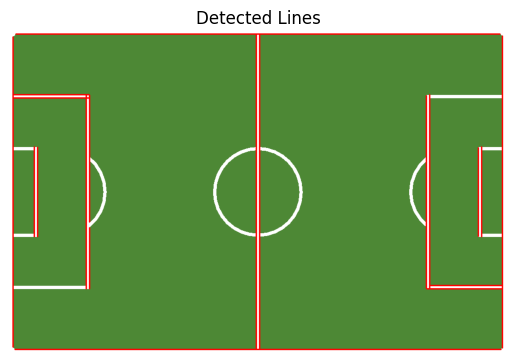

[(6.0, 6.0),
 (6.0, 134.0),
 (6.0, 141.0),
 (6.0, 537.0),
 (6.0, 544.0),
 (6.0, 672.0),
 (51.0, 6.0),
 (51.0, 134.0),
 (51.0, 141.0),
 (51.0, 537.0),
 (51.0, 544.0),
 (51.0, 672.0),
 (58.0, 6.0),
 (58.0, 134.0),
 (58.0, 141.0),
 (58.0, 537.0),
 (58.0, 544.0),
 (58.0, 672.0),
 (161.0, 6.0),
 (161.0, 134.0),
 (161.0, 141.0),
 (161.0, 537.0),
 (161.0, 544.0),
 (161.0, 672.0),
 (168.0, 6.0),
 (168.0, 134.0),
 (168.0, 141.0),
 (168.0, 537.0),
 (168.0, 544.0),
 (168.0, 672.0),
 (521.0, 6.0),
 (521.0, 134.0),
 (521.0, 141.0),
 (521.0, 537.0),
 (521.0, 544.0),
 (521.0, 672.0),
 (528.0, 6.0),
 (528.0, 134.0),
 (528.0, 141.0),
 (528.0, 537.0),
 (528.0, 544.0),
 (528.0, 672.0),
 (881.0, 6.0),
 (881.0, 134.0),
 (881.0, 141.0),
 (881.0, 537.0),
 (881.0, 544.0),
 (881.0, 672.0),
 (888.0, 6.0),
 (888.0, 134.0),
 (888.0, 141.0),
 (888.0, 537.0),
 (888.0, 544.0),
 (888.0, 672.0),
 (991.0, 6.0),
 (991.0, 134.0),
 (991.0, 141.0),
 (991.0, 537.0),
 (991.0, 544.0),
 (991.0, 672.0),
 (998.0, 6.0),
 (998.0, 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image with lines detected
lines_detected_path = 'assets/world_cup_template.png'
image = cv2.imread(lines_detected_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the lines on the image
line_img = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with detected lines
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')
plt.show()

# Collect the line equations (ax + by = c)
line_equations = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        a = y2 - y1
        b = x1 - x2
        c = a * x1 + b * y1
        line_equations.append((a, b, c))

# Find intersection points
def find_intersection(line1, line2):
    a1, b1, c1 = line1
    a2, b2, c2 = line2
    determinant = a1 * b2 - a2 * b1
    if determinant == 0:
        return None  # lines are parallel
    else:
        x = (b2 * c1 - b1 * c2) / determinant
        y = (a1 * c2 - a2 * c1) / determinant
        return (x, y)

# Calculate all intersection points
intersection_points = []
for i in range(len(line_equations)):
    for j in range(i + 1, len(line_equations)):
        intersection = find_intersection(line_equations[i], line_equations[j])
        if intersection:
            intersection_points.append(intersection)

# intersection_points
# Filter out duplicate points
unique_intersection_points = list(set(intersection_points))
unique_intersection_points.sort()  # Sort for better readability

unique_intersection_points


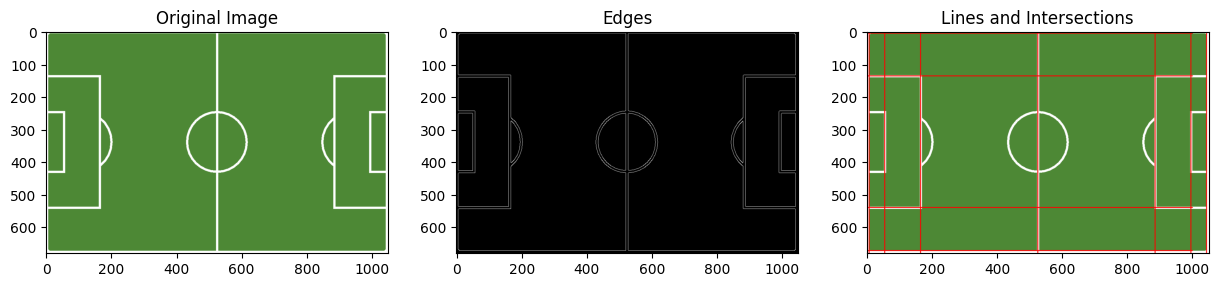

Intersection Points: [(-137236424880885690766721024, -5998794703657500672), (524, 672), (1042, 672), (6, 672), (164, 672), (884, 672), (76670817781304448, 3351388558), (311639179498915456, 13622181852), (54, 672), (994, 672), (524, 6), (1042, 6), (6, 6), (164, 6), (884, 6), (-311639179498915776, -13622181174), (-76670817781304832, -3351387880), (54, 6), (994, 6), (524, 541), (524, 138), (1042, 541), (1042, 138), (6, 541), (6, 138), (164, 541), (164, 138), (884, 541), (884, 138), (54, 541), (994, 541), (54, 138), (994, 138)]
Number of Intersection Points: 33


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'assets/world_cup_template.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

# Function to merge lines
def merge_lines(lines, rho_threshold, theta_threshold):
    merged_lines = []
    for line in lines:
        rho, theta = line[0]
        merged = False
        for merged_line in merged_lines:
            rho_m, theta_m = merged_line
            if abs(rho - rho_m) < rho_threshold and abs(theta - theta_m) < theta_threshold:
                merged_lines.remove(merged_line)
                merged_lines.append(((rho + rho_m) / 2, (theta + theta_m) / 2))
                merged = True
                break
        if not merged:
            merged_lines.append((rho, theta))
    return merged_lines

# Merge lines
rho_threshold = 15
theta_threshold = np.pi / 90
merged_lines = merge_lines(lines, rho_threshold, theta_threshold)

# Create a copy of the original image to draw lines
line_image = np.copy(image)

# Draw merged lines on the image in red color
if merged_lines is not None:
    for rho, theta in merged_lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Function to find the intersection point of two lines
def get_intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
    b = np.array([rho1, rho2])
    if np.linalg.det(A) != 0:  # Check if the determinant is non-zero (lines are not parallel)
        x, y = np.linalg.solve(A, b)
        return int(np.round(x)), int(np.round(y))
    else:
        return None

# Find intersection points
intersection_points = []
for i in range(len(merged_lines)):
    for j in range(i + 1, len(merged_lines)):
        intersection = get_intersection(merged_lines[i], merged_lines[j])
        if intersection:
            intersection_points.append(intersection)

# Create a copy of the original image to draw lines and points
line_image = np.copy(image)

# Draw merged lines on the image in red color and label them
for idx, (rho, theta) in enumerate(merged_lines):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color
    # Label the line
    cv2.putText(line_image, f'L{idx+1}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# # Draw intersection points on the image and label them
# for idx, point in enumerate(intersection_points):
#     if point is not None:  # Only draw valid points
#         x, y = point
#         if isinstance(x, int) and isinstance(y, int):  # Ensure coordinates are integers
#             cv2.circle(line_image, (x, y), 5, (255, 0, 0), -1)  # Blue color
#             # Label the intersection point
#             cv2.putText(line_image, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
#         else:
#             print(f"Invalid intersection point: {point}")



# Display the original image, edges, and the image with lines and points
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines and Intersections')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.imsave('./assets/lines_intersections.png', cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

# Print intersection points
print("Intersection Points:", intersection_points)
print("Number of Intersection Points:", len(intersection_points))


In [ ]:
# Filter out duplicate points
unique_intersection_points = list(set(intersection_points))
unique_intersection_points.sort()  # Sort for better readability

unique_intersection_points

[(-137236424880885690766721024, -5998794703657500672),
 (-311639179498915776, -13622181174),
 (-76670817781304832, -3351387880),
 (6, 6),
 (6, 138),
 (6, 541),
 (6, 672),
 (54, 6),
 (54, 138),
 (54, 541),
 (54, 672),
 (164, 6),
 (164, 138),
 (164, 541),
 (164, 672),
 (524, 6),
 (524, 138),
 (524, 541),
 (524, 672),
 (884, 6),
 (884, 138),
 (884, 541),
 (884, 672),
 (994, 6),
 (994, 138),
 (994, 541),
 (994, 672),
 (1042, 6),
 (1042, 138),
 (1042, 541),
 (1042, 672),
 (76670817781304448, 3351388558),
 (311639179498915456, 13622181852)]

In [ ]:
# Filter out too large or too small points
filtered_intersection_points = []
for x, y in unique_intersection_points:
    if 0 <= x <= image.shape[1] and 0 <= y <= image.shape[0]:
        filtered_intersection_points.append((x, y))

filtered_intersection_points

[(6, 6),
 (6, 138),
 (6, 541),
 (6, 672),
 (54, 6),
 (54, 138),
 (54, 541),
 (54, 672),
 (164, 6),
 (164, 138),
 (164, 541),
 (164, 672),
 (524, 6),
 (524, 138),
 (524, 541),
 (524, 672),
 (884, 6),
 (884, 138),
 (884, 541),
 (884, 672),
 (994, 6),
 (994, 138),
 (994, 541),
 (994, 672),
 (1042, 6),
 (1042, 138),
 (1042, 541),
 (1042, 672)]

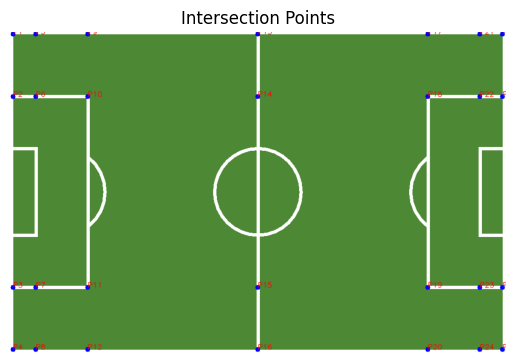

In [ ]:
# Display the original image with the intersection points plotted
image_with_points = image.copy()
for idx, (x, y) in enumerate(filtered_intersection_points):
    cv2.circle(image_with_points, (x, y), 5, (255, 0, 0), -1)  # Blue color
    # Label the intersection point
    cv2.putText(image_with_points, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(image_with_points, cv2.COLOR_BGR2RGB))
plt.title('Intersection Points')
plt.axis('off')
plt.show()

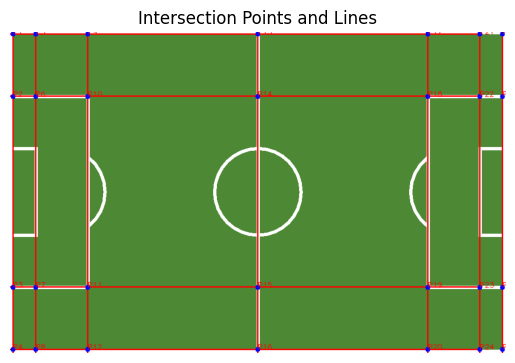

True

In [ ]:
# Display the original image with the intersection points and the lines plotted
image_with_points_lines = line_image.copy()
for idx, (x, y) in enumerate(filtered_intersection_points):
    cv2.circle(image_with_points_lines, (x, y), 5, (255, 0, 0), -1)  # Blue color
    # Label the intersection point
    cv2.putText(image_with_points_lines, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(image_with_points_lines, cv2.COLOR_BGR2RGB))
plt.title('Intersection Points and Lines')
plt.axis('off')
plt.show()

# Save the image with intersection points and lines
cv2.imwrite('assets/lines_intersections_points.png', image_with_points_lines)

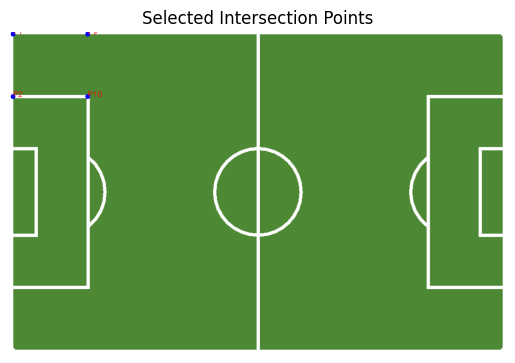

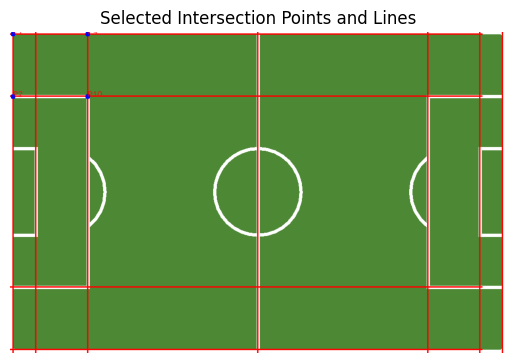

Selected Intersection Points: [(6, 138), (164, 138), (6, 6), (164, 6)]


In [ ]:
# Select specific points: P2, P10, P1, and P9 (assuming they are at these indices)
selected_points_indices = [1, 9, 0, 8]  # These indices may need adjustment based on actual points
selected_points = [filtered_intersection_points[i] for i in selected_points_indices]

# Display the original image with the intersection points plotted
image_with_points = image.copy()
for idx, (x, y) in enumerate(filtered_intersection_points):
    if (x, y) in selected_points:
        cv2.circle(image_with_points, (x, y), 5, (255, 0, 0), -1)  # Blue color
        # Label the intersection point
        cv2.putText(image_with_points, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(image_with_points, cv2.COLOR_BGR2RGB))
plt.title('Selected Intersection Points')
plt.axis('off')
plt.show()

# Display the original image with the intersection points and the lines plotted
image_with_points_lines = line_image.copy()
for idx, (x, y) in enumerate(filtered_intersection_points):
    if (x, y) in selected_points:
        cv2.circle(image_with_points_lines, (x, y), 5, (255, 0, 0), -1)  # Blue color
        # Label the intersection point
        cv2.putText(image_with_points_lines, f'P{idx+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(image_with_points_lines, cv2.COLOR_BGR2RGB))
plt.title('Selected Intersection Points and Lines')
plt.axis('off')
plt.show()

# Save the image with selected intersection points and lines
cv2.imwrite('assets/selected_lines_intersections_points.png', image_with_points_lines)

print("Selected Intersection Points:", selected_points)

In [ ]:
# Store these points in an array
selected_points = np.array(selected_points)
np.save('assets/selected_points_template.npy', selected_points)